# Part 1: Understanding Product Categories
### Business Question: 
What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### 1 Frequency Tables:
- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

### 2 Visualizations:
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
path_to_csv = "../amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path_to_csv)

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [7]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [11]:
# Generate a frequency table for the product category.

freq_table = df['category'].value_counts().sort_values(ascending=False)
freq_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [21]:
# Which are the top 5 most listed product categories?
top_categories = freq_table.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category'>

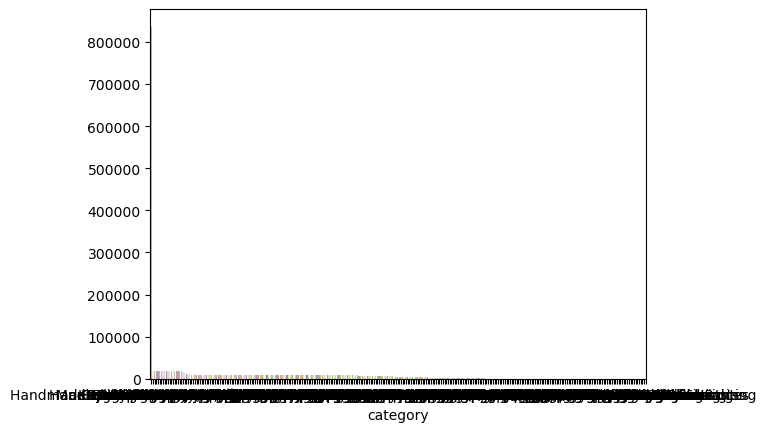

In [17]:
# Display the distribution of products across different categories using a bar chart.
# If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(x=freq_table.index, y=freq_table.values, palette="Set3")

<Axes: ylabel='category'>

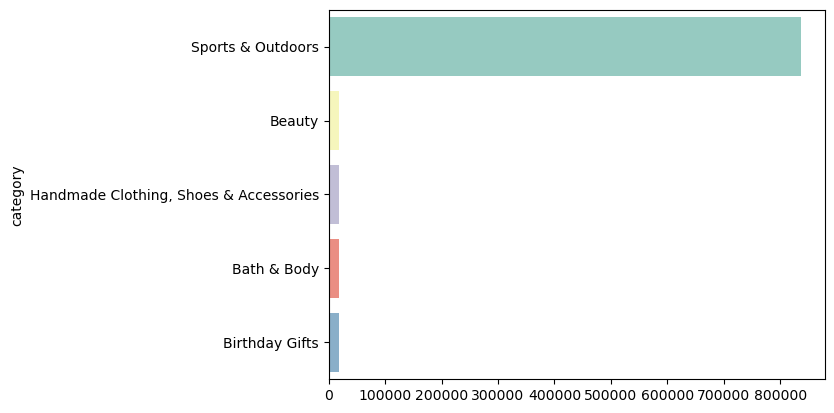

In [25]:
# If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(y=top_categories.index, x=top_categories.values, palette="Set3")

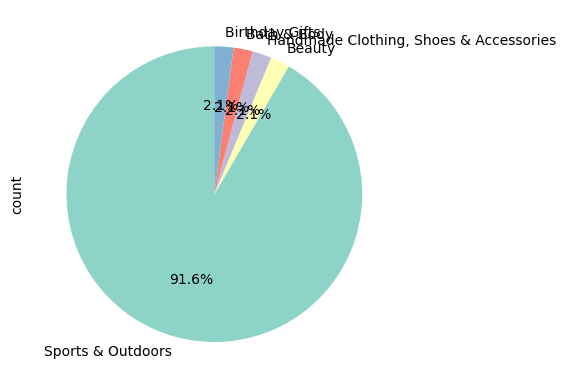

In [27]:
# For a subset of top categories, visualize their proportions using a pie chart.
# Does any category dominate the listings?

top_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

# Sports & Outdoors seems to be the most dominant category

# Part 2: Delving into Product Pricing
### Business Question: 
How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1 Measures of Centrality:
- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

### Measures of Dispersion:
- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

### Visualizations:
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [35]:
df['price'].value_counts().sort_values(ascending=False).head(20)
# The most common prices end with $.99 cents

price
9.99     48922
12.99    38823
8.99     34058
7.99     33632
14.99    32570
6.99     31948
5.99     27818
19.99    27436
11.99    25488
10.99    25172
16.99    24284
13.99    23747
4.99     22438
15.99    21362
3.99     18121
29.99    17487
17.99    16509
18.99    14779
24.99    14364
23.99    14151
Name: count, dtype: int64

In [34]:
df['price'].value_counts().sort_values(ascending=False).tail(20)
# Outliers have a random number of cents in the price

price
449.01     1
566.57     1
627.59     1
431.53     1
4578.48    1
886.49     1
591.87     1
348.60     1
446.51     1
188.83     1
7999.99    1
1433.36    1
708.10     1
3038.28    1
521.53     1
481.17     1
560.60     1
1552.17    1
349.08     1
317.34     1
Name: count, dtype: int64

In [41]:
df.price.nunique()

82916

In [31]:
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode()[0]

mean, median, mode

(89.24380943923663, 19.09, 9.99)

#### What's the average price point of products listed? How does this compare with the most common price point (mode)?
The average price of the dataset is 89.24, while the mode of this dataset is 9.99. This could be do to many extreme values influencing the average, but the most common price in the dataset is 9.99 meaning most of the items sold cost 9.99

In [36]:
# Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

#### How varied are the product prices? Are there any indicators of a significant spread in prices?
The product prices are extremely varied as we can infer from the high variance value, and the high standard deviation. This indicates that prices are widely spread out from the mean. The Range of 100000 supports this claim about the large spread of prices. The quantiles help us understand that 25% of the products have a price of 9.99 or below. The 50th percentile (or median) of 19.09, and the 75th percentile price of 45.99 suggest that there is a considerable range between the prices of different products. 

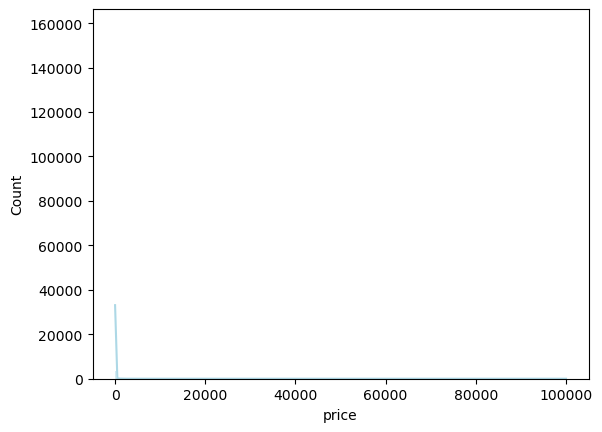

In [43]:
# Is there a specific price range where most products fall? -> YES, between 0 and 45.99.
# Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved.

sns.histplot(df['price'], kde=True, bins=80000, color='lightblue');

The range where most values fall can be between 0 and 45.99, as this is the 75th percentile meaning 75% of the values would fall into this range. The histogram is amost impossible to read because of the very large range of values for price (variance). A way to make this data easier to visualize can be with a boxplot. 

<Axes: >

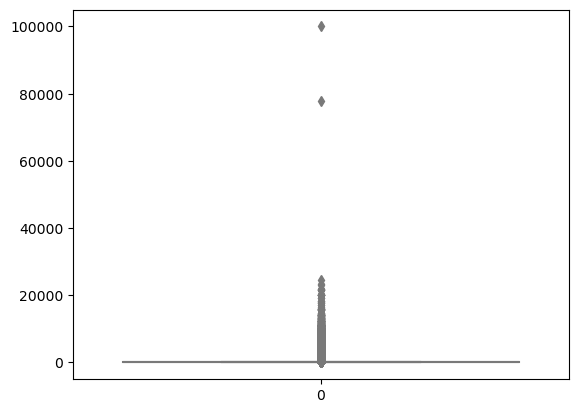

In [45]:
# Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data=df['price'], color='lightblue')

YES, there are products priced significantly higher than the rest as we can see in the boxplot. These values make it difficult to see the "box" where the median and most of the values fall. Most values cannot be seen in this boxplot due to extremely high values. 

# Part 3: Unpacking Product Ratings
### Business Question: 
How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1 Measures of Centrality:
- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

### 2 Measures of Dispersion:
- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

### 3 Shape of the Distribution:
- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

### 4 Visualizations:
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [46]:
# Calculate the mean, median, and mode for the rating of products.

mean = df['stars'].mean()
median = df['stars'].median()
mode = df['stars'].mode()[0]

mean, median, mode

(2.152836472966065, 0.0, 0.0)

#### Most customers do not leave reviews leading to most the the values (mode) being 0.0

In [47]:
# Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?

variance_rating = df['stars'].var()
std_rating = df['stars'].std()
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_rating, quantiles_rating

(4.81743402976196,
 2.1948653785054697,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

 There is a variance of 4.82 and a standard deviation of 2.19 which tells us that the customer feedback contains some diversity. The fact that both the 25th percentile and the 50th percentile are both equal to 0.0 indicates that a significant portion of the rating are clustered around 0 (could be due to customers not rating the product, or sellers omiting bad ratings). The 75th percentile at 4.4 indicates that 25% of the rating are higher than 4.4. Overall, the ratings appear to show some consistency, but there is also a wide variation in customer feedback, especially considering the spread of ratings from 0 to 4.4. 

In [48]:
# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_ratings = df['stars'].skew()
kurtosis_ratings = df['stars'].kurtosis()

skewness_ratings, kurtosis_ratings

(0.08120735761080985, -1.9260061280432985)

The skewness is positive which tells us that this data is slightly skewed to the right, and the fact that the skewness (0.08) is so close to 0 tells us that it is somewhat symmetrical. The value for kurtosis (-1.93) tells us that the distribution is flatter and less peaked (negative kurtosis) than a normal distribution. This suggests that the ratings may be more spread out and less concentrated around the mean compared to a normal distribution.

<Axes: xlabel='stars', ylabel='Count'>

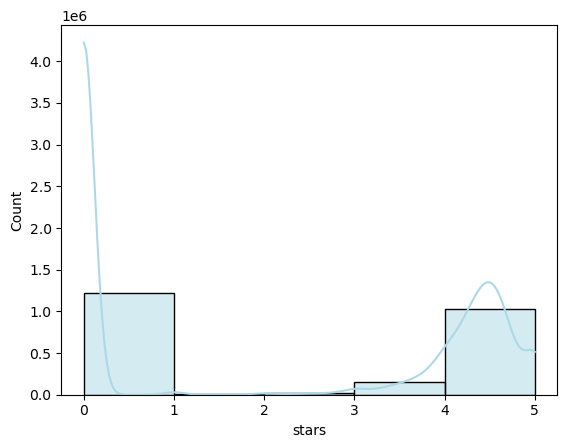

In [49]:
# Plot a histogram to visualize the distribution of product ratings.
# Is there a specific rating that is more common?

sns.histplot(df['stars'], kde=True, bins=5, color='lightblue')

The most common ratings are 0 and 5, but this could be due to some customers omiting a rating for the product making 0 so popular.